<a href="https://colab.research.google.com/github/Gunalank018/Fake-news-detection/blob/main/fake_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded=files.upload()

Saving True.csv to True.csv


In [4]:
from google.colab import files
uploaded=files.upload()

Saving Fake.csv to Fake.csv


In [3]:
import pandas as pd
df=pd.read_csv('True.csv')
print(df)

                                                   title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv... 

In [6]:
import pandas as pd
Fdf=pd.read_csv('Fake.csv')
print(Fdf)

                                                   title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject  \
0      Donald Trump just couldn t wish all Americans ...         News   
1      House Intelligence Committee Chairman Devin Nu...         News   
2      On Friday, it was revealed that former Milwauk...    

In [10]:
X = df["title"].tolist() + Fdf["title"].tolist()
y = [0] * len(df) + [1] * len(Fdf)


In [7]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
pip install simple_nlp_library

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 MB 7.0 MB/s eta 0:00:00


In [13]:
from simple_nlp_library import preprocessing, embeddings

In [14]:
stop_words = preprocessing.stop_words()
vectors = embeddings.vectors()


In [15]:
X_train_vec = [embeddings.tokens_vector(vectors, preprocessing.semantic_tokens(stop_words, x)) for x in X_train]
X_test_vec = [embeddings.tokens_vector(vectors, preprocessing.semantic_tokens(stop_words, x)) for x in X_test]


In [16]:
from sklearn.neural_network import MLPClassifier

In [17]:
clf = MLPClassifier(hidden_layer_sizes=(25), early_stopping=True)
clf.fit(X_train_vec, y_train)


MLPClassifier(early_stopping=True, hidden_layer_sizes=25)

In [18]:

MLPClassifier(early_stopping=True, hidden_layer_sizes=25)


MLPClassifier(early_stopping=True, hidden_layer_sizes=25)

In [19]:
import matplotlib.pyplot as plt


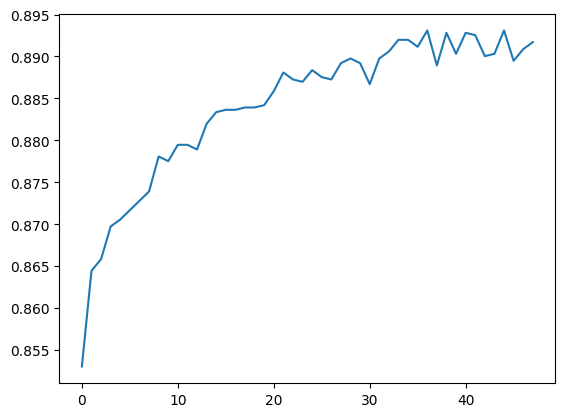

In [20]:
plt.plot(clf.validation_scores_)

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy_score(y_train, clf.predict(X_train_vec))



0.8977392950609722

In [24]:
accuracy_score(y_test, clf.predict(X_test_vec))

0.8861915367483296